In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 이미지 임계처리
### 기본 임계처리
### cv2.threshold(src, thresh, maxval, type)
#### type
- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

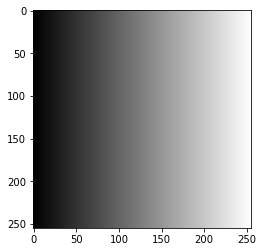

In [4]:
img = np.zeros((255,255,3), np.uint8)
for i in range(255):
    img[:,i] = i
plt.imshow(img)

Text(0.5, 1.0, 'THRESH_TOZERO_INV')

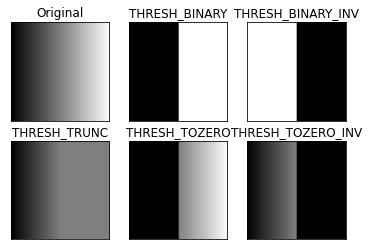

In [14]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

plt.subplot(231);plt.xticks([]);plt.yticks([]);plt.imshow(img);plt.title("Original")
plt.subplot(232);plt.xticks([]);plt.yticks([]);plt.imshow(thresh1);plt.title("THRESH_BINARY")
plt.subplot(233);plt.xticks([]);plt.yticks([]);plt.imshow(thresh2);plt.title("THRESH_BINARY_INV")
plt.subplot(234);plt.xticks([]);plt.yticks([]);plt.imshow(thresh3);plt.title("THRESH_TRUNC")
plt.subplot(235);plt.xticks([]);plt.yticks([]);plt.imshow(thresh4);plt.title("THRESH_TOZERO")
plt.subplot(236);plt.xticks([]);plt.yticks([]);plt.imshow(thresh5);plt.title("THRESH_TOZERO_INV")

### 적응형 임계처리
### cv2.adaptiveThreshold(src, maxVal, adaptiveMethod, thresholdType, blockSize, C)
- src : grayscale img
- maxVal : threshold
- adaptiveMethod : 임계값 결정 계산방법
- blockSize : thersholding 적용 영역 사이즈
- C : 평균에서 차감할 값

In [ ]:
img = cv2.imread('image2.jpg')
#img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,1)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,1)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
	plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()

### using OTSU

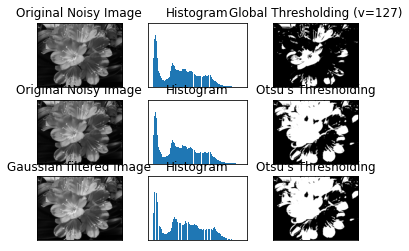

In [63]:
img = cv2.imread('flower1.jpg',0)
# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)

ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
	plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
	plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
	plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256) # ravel : 이미지를 flatten된 array로
	plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
	plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
	plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()